In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)

In [2]:
mnist = input_data.read_data_sets("../data/MNIST_data/", one_hot=True)

Extracting ../data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [4]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

In [5]:
# reshape needed for CNN
# gray image(1-channel) with size 28 x 28
X_img = tf.reshape(X, [-1, 28, 28, 1])

In [6]:
# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.truncated_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
L1 = tf.nn.conv2d(X_img, filter=W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

In [7]:
# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.truncated_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
L2 = tf.nn.conv2d(L1, filter=W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

In [8]:
# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.truncated_normal([3, 3, 64, 128], stddev=0.01))
#    Conv      ->(?, 7, 7, 128)
L3 = tf.nn.conv2d(L2, filter=W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
#    Pool      ->(?, 4, 4, 128)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])

In [9]:
# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.truncated_normal([625], stddev=0.01))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

In [10]:
# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.truncated_normal([10], stddev=0.01))
logits = tf.matmul(L4, W5) + b5

In [11]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [12]:
# start training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print('Learning started. It takes sometime.')
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
            c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

    print('Learning Finished!')
    
    # Test model and check accuracy
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy:', sess.run(accuracy, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

Learning started. It takes sometime.
Epoch: 0001 cost = 0.314817293
Epoch: 0002 cost = 0.101358062
Epoch: 0003 cost = 0.075268937
Epoch: 0004 cost = 0.062139312
Epoch: 0005 cost = 0.054043187
Epoch: 0006 cost = 0.047333400
Epoch: 0007 cost = 0.041649062
Epoch: 0008 cost = 0.037869917
Epoch: 0009 cost = 0.034863928
Epoch: 0010 cost = 0.034775302
Epoch: 0011 cost = 0.031832157
Epoch: 0012 cost = 0.030607718
Epoch: 0013 cost = 0.028367714
Epoch: 0014 cost = 0.027992049
Epoch: 0015 cost = 0.024209626
Learning Finished!
Accuracy: 0.9931
Label:  [7]
Prediction:  [7]


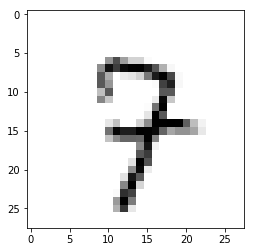

In [13]:
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()